## **Câu 1 ==> D**

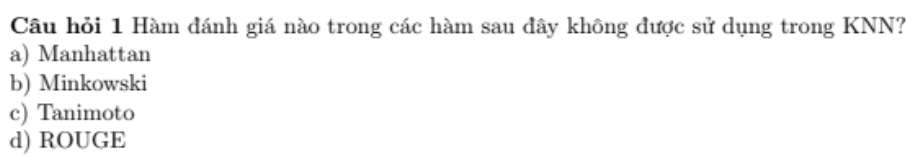

## **Câu 2 ==> C**

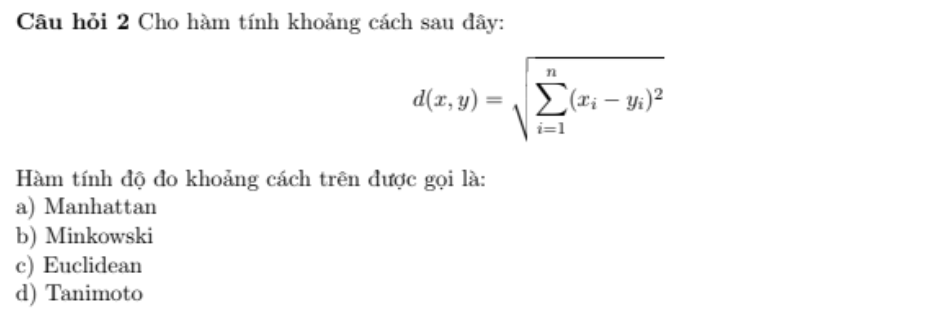

## **Câu 3 ==> A**

In [7]:
import numpy as np 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [8]:
# Load Iris dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)

# Split train, test by 80:20
X_train, X_test, y_train, y_test = train_test_split(
    iris_X,
    iris_y,
    test_size=0.2,
    random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# Predict and evaluate test set
y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

## **Câu 4 ==> B**

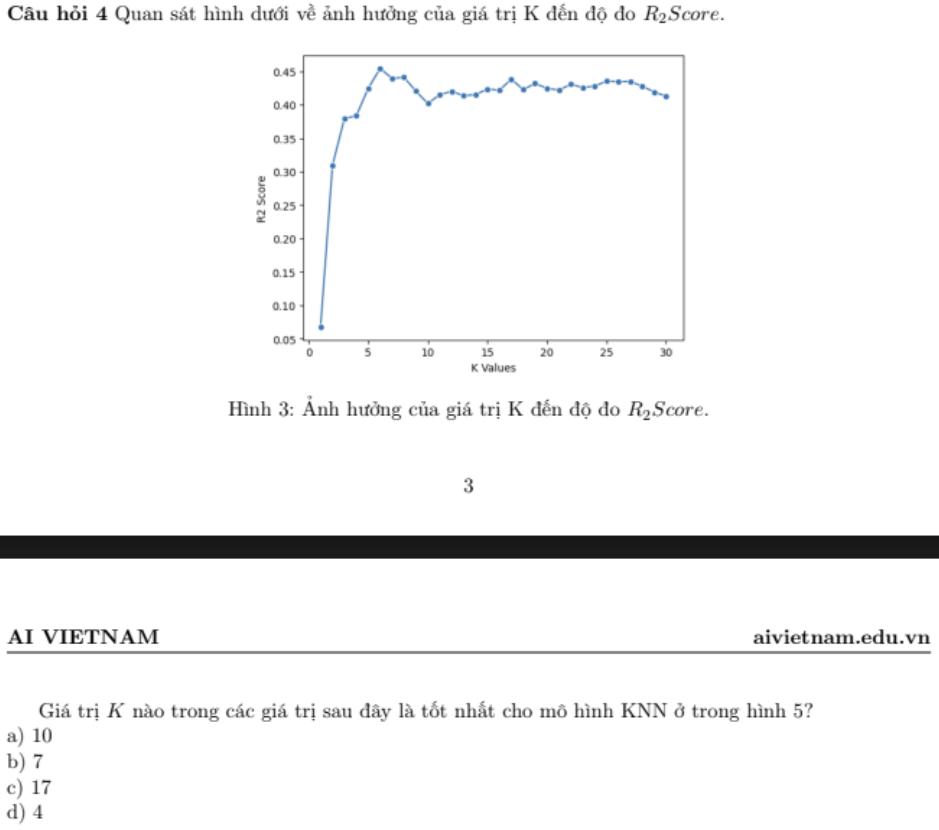

## **Câu 5 ==> B**

In [17]:
import numpy as np 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [20]:
# Load dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Split train, test by 80:20
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_X,
    diabetes_y,
    test_size=0.2,
    random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build KNN Regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Evaluate
y_pred = knn_regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

3047.449887640449

## **Câu 6 ==> D**

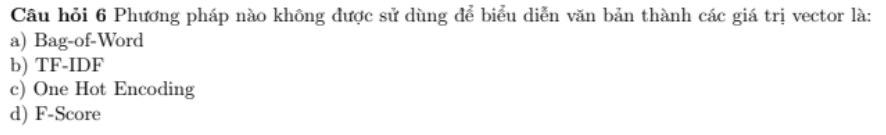

## **Câu 7 ==> C**

In [27]:
import numpy as np 
from datasets import load_dataset
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
# Load IMDB dataset
imdb = load_dataset("imdb")
imdb_train, imdb_test = imdb["train"], imdb["test"]

Generating unsupervised split: 100%|██████████| 50000/50000 [00:00<00:00, 147439.02 examples/s]


In [29]:
# Convert text to vector using BoW
vectorizer = CountVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(imdb_train["text"]).toarray()
X_test = vectorizer.transform(imdb_test["text"]).toarray()
y_train = np.array(imdb_train["label"])
y_test = np.array(imdb_test["label"])

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1, algorithm="ball_tree")
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

## **Câu 8 ==> D**

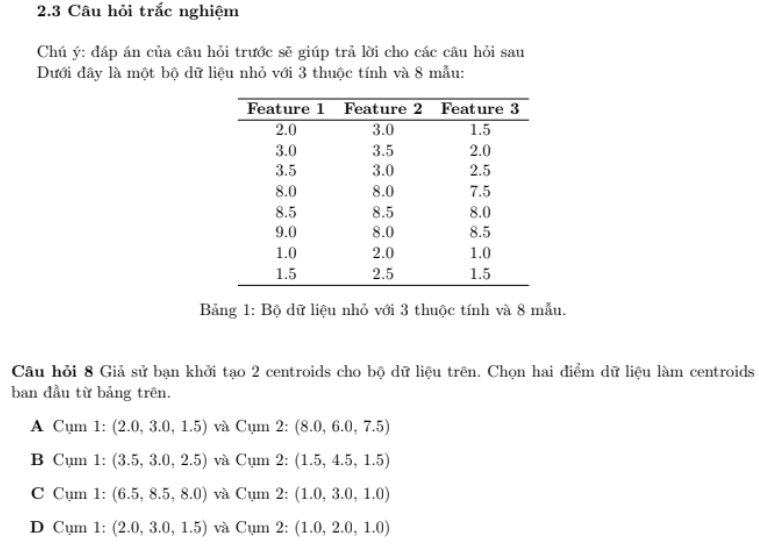

## **Câu 9 ==> D**

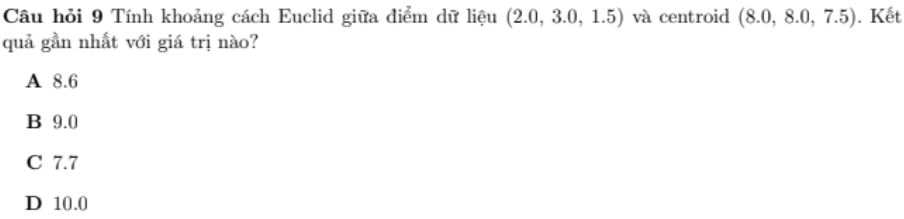

## **Câu 10 ==> A**

## **Câu 11 ==> C**

## **Câu 12 ==> A**

## **Câu 13 ==> B**

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

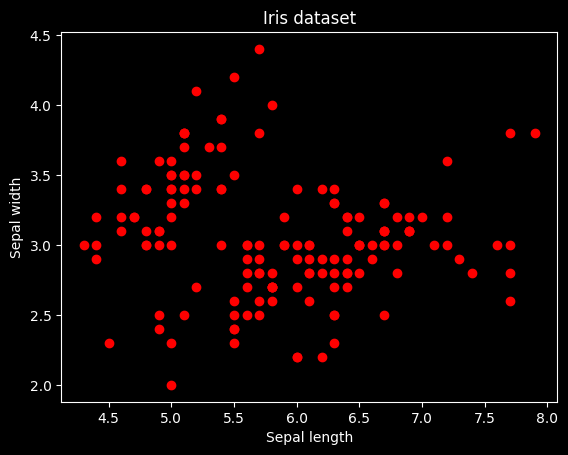

In [7]:
iris_dataset = datasets.load_iris()
data = iris_dataset.data[:, :2]

# Plot data
plt.scatter(data[:, 0], data[:, 1], c="red")
plt.title("Iris dataset")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

In [13]:
new_data = np.array(
    [[2.0, 3.0, 1.5],
    [3.0, 3.5, 2.0],
    [3.5, 3.0, 2.5],
    [8.0, 8.0, 7.5],
    [8.5, 8.5, 8.0],
    [9.0, 8.0, 8.5],
    [1.0, 2.0, 1.0],
    [1.5, 2.5, 1.5]]
)


In [14]:
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.clusters = None
    
    def initialize_centroids(self, data):
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], size=self.k, replace=False)]
    
    def euclidian_distance(self, x1, x2):
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))
    
    def assign_clusters(self, data):
        distances = np.array(
            [[self.euclidian_distance(centroid, x) 
             for centroid in self.centroids]
             for x in data]
        )
        
        return np.argmin(distances, axis=1)
    
    def update_centroids(self, data):
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])
    
    def fit(self, data):
        self.initialize_centroids(data)
        
        for i in range(self.max_iters):
            self.clusters = self.assign_clusters(data)
            self.plot_clusters(data, i)
            
            new_centroids = self.update_centroids(data)
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids
            
        self.plot_final_clusters(data)
        
    def plot_clusters(self, data, iter):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap="viridis", marker="o", alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c="red", marker="x")
        plt.title(f"Iteration {iter + 1}")
        plt.xlabel("Sepal length")
        plt.ylabel("Sepal width")
        plt.show()
        
    def plot_final_clusters(self, data):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap="viridis", marker="o", alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c="red", marker="x")
        plt.title("Final clusters and centroids")
        plt.xlabel("Sepal length")
        plt.ylabel("Sepal width")
        plt.show()

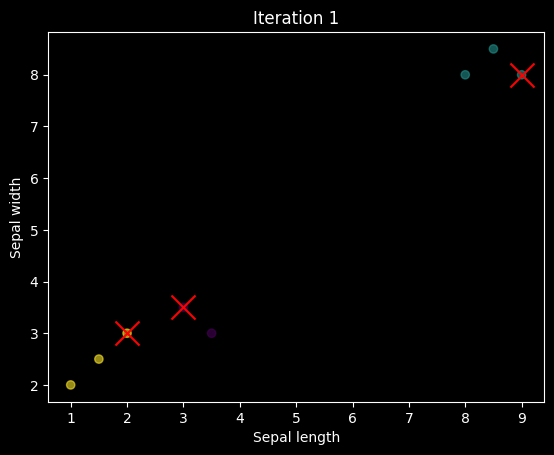

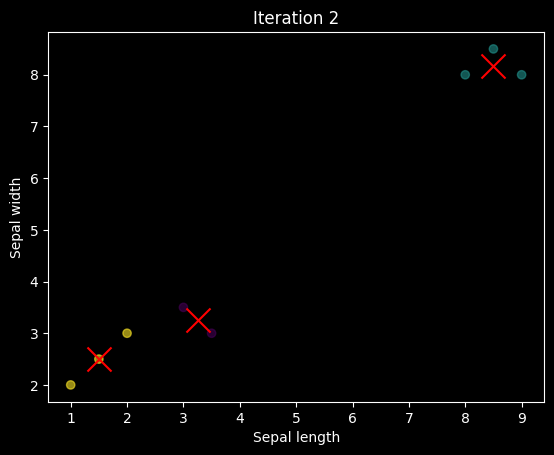

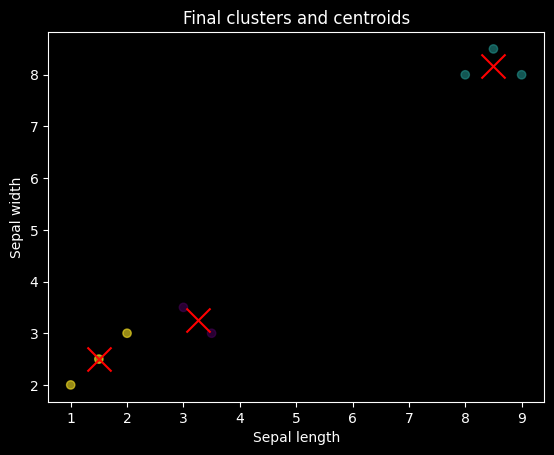

array([[3.25      , 3.25      , 2.25      ],
       [8.5       , 8.16666667, 8.        ],
       [1.5       , 2.5       , 1.33333333]])

In [17]:
kmeans = KMeans(k=3)
kmeans.fit(new_data)
kmeans.centroids